
                          ADVANCED ANALYTICS                          

📊 Frequency-Monetary Analysis:
   Score Distribution (Min=2, Max=5):
      Score 2: 88 customers
      Score 3: 87 customers
      Score 4: 90 customers
      Score 5: 85 customers

💰 Customer Lifetime Value Distribution:
   • Min: $410.80
   • 25th Percentile: $502.00
   • Median: $775.20
   • 75th Percentile: $1,160.60
   • Max: $1,520.10
   • Standard Deviation: $362.06

🛒 Purchase Behavior Patterns:
   • 1 purchase: 350 customers (100.0%)

💳 Spending Behavior Patterns:
   • $201-500: 83 customers (23.7%)
   • $501-1000: 150 customers (42.9%)
   • $1000+: 117 customers (33.4%)

📈 Pareto Analysis (80/20 Rule):
   • Top 20% of Customers (70 customers)
   • Generate $99,026.20 (33.5% of total revenue)

                        TOP CUSTOMERS ANALYSIS                        

🏆 TOP 20 CUSTOMERS BY TOTAL SPENDING:

────────────────────────────────────────────────────────────────────────────────────────────────────
Ran

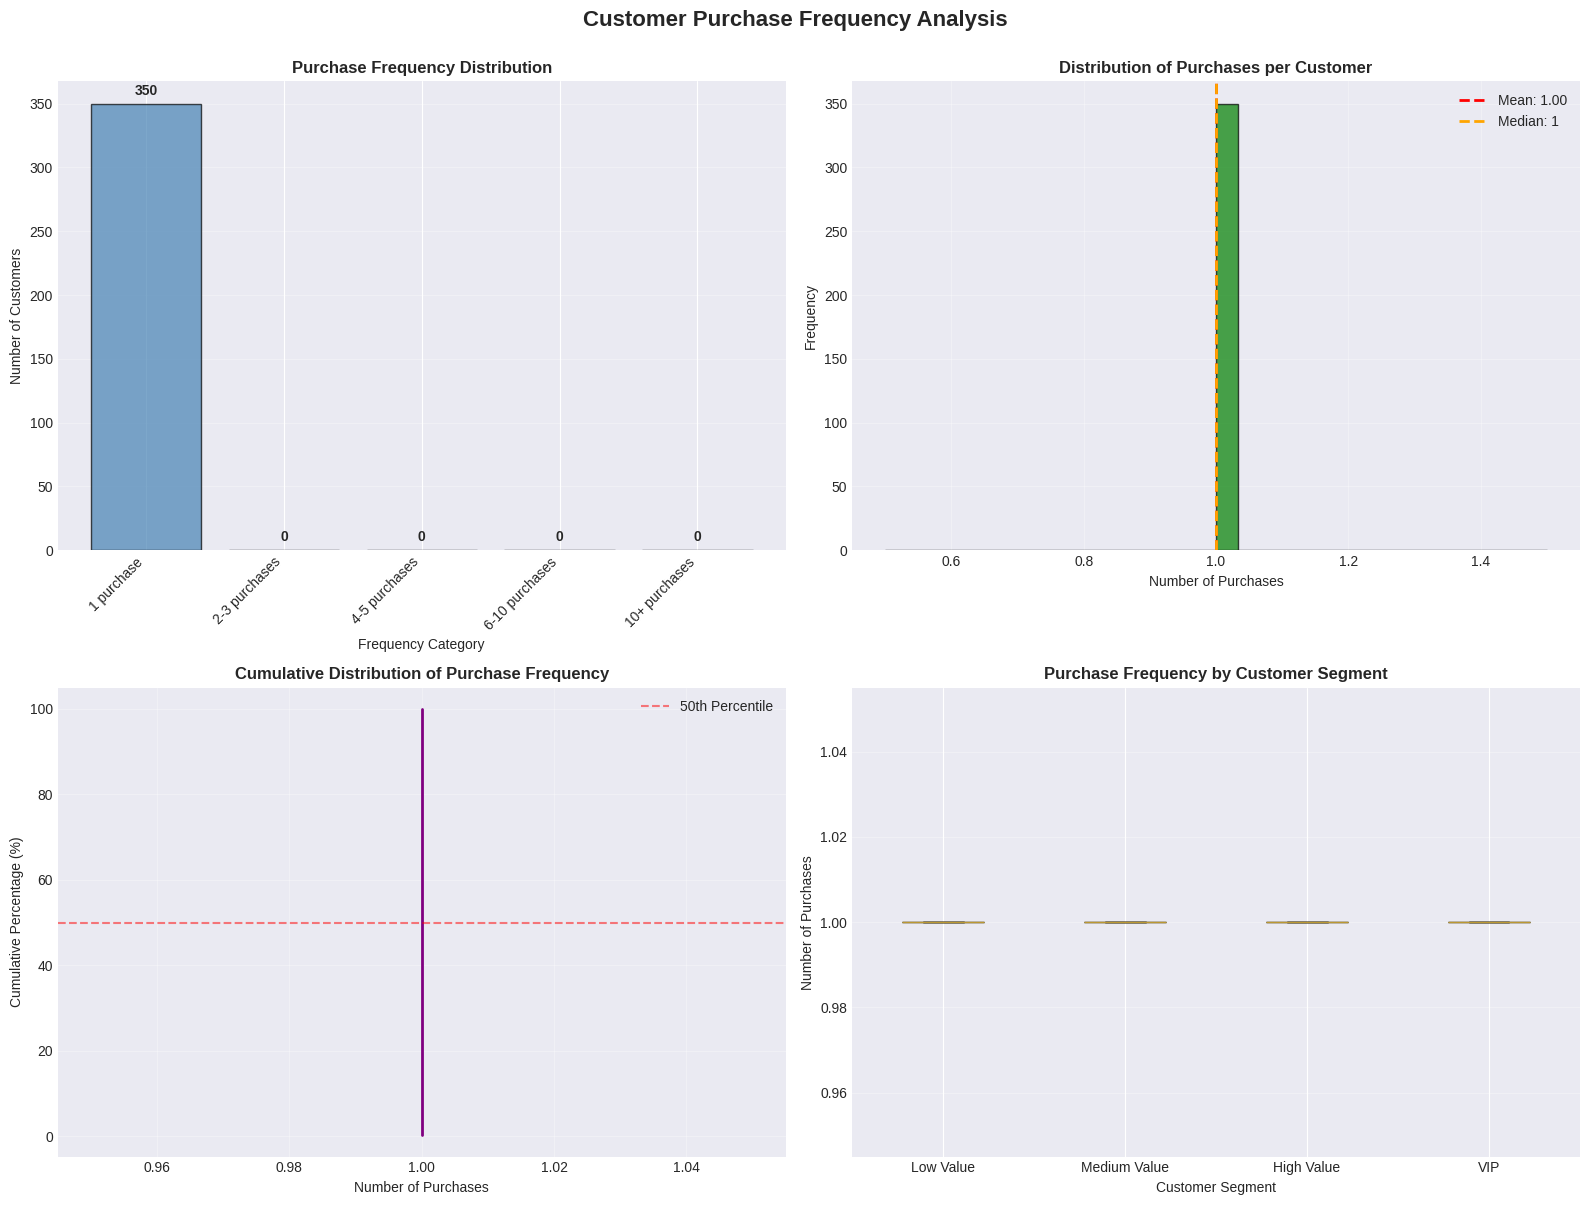

✓ Purchase frequency visualizations created

                   VISUALIZATION: SPENDING ANALYSIS                   


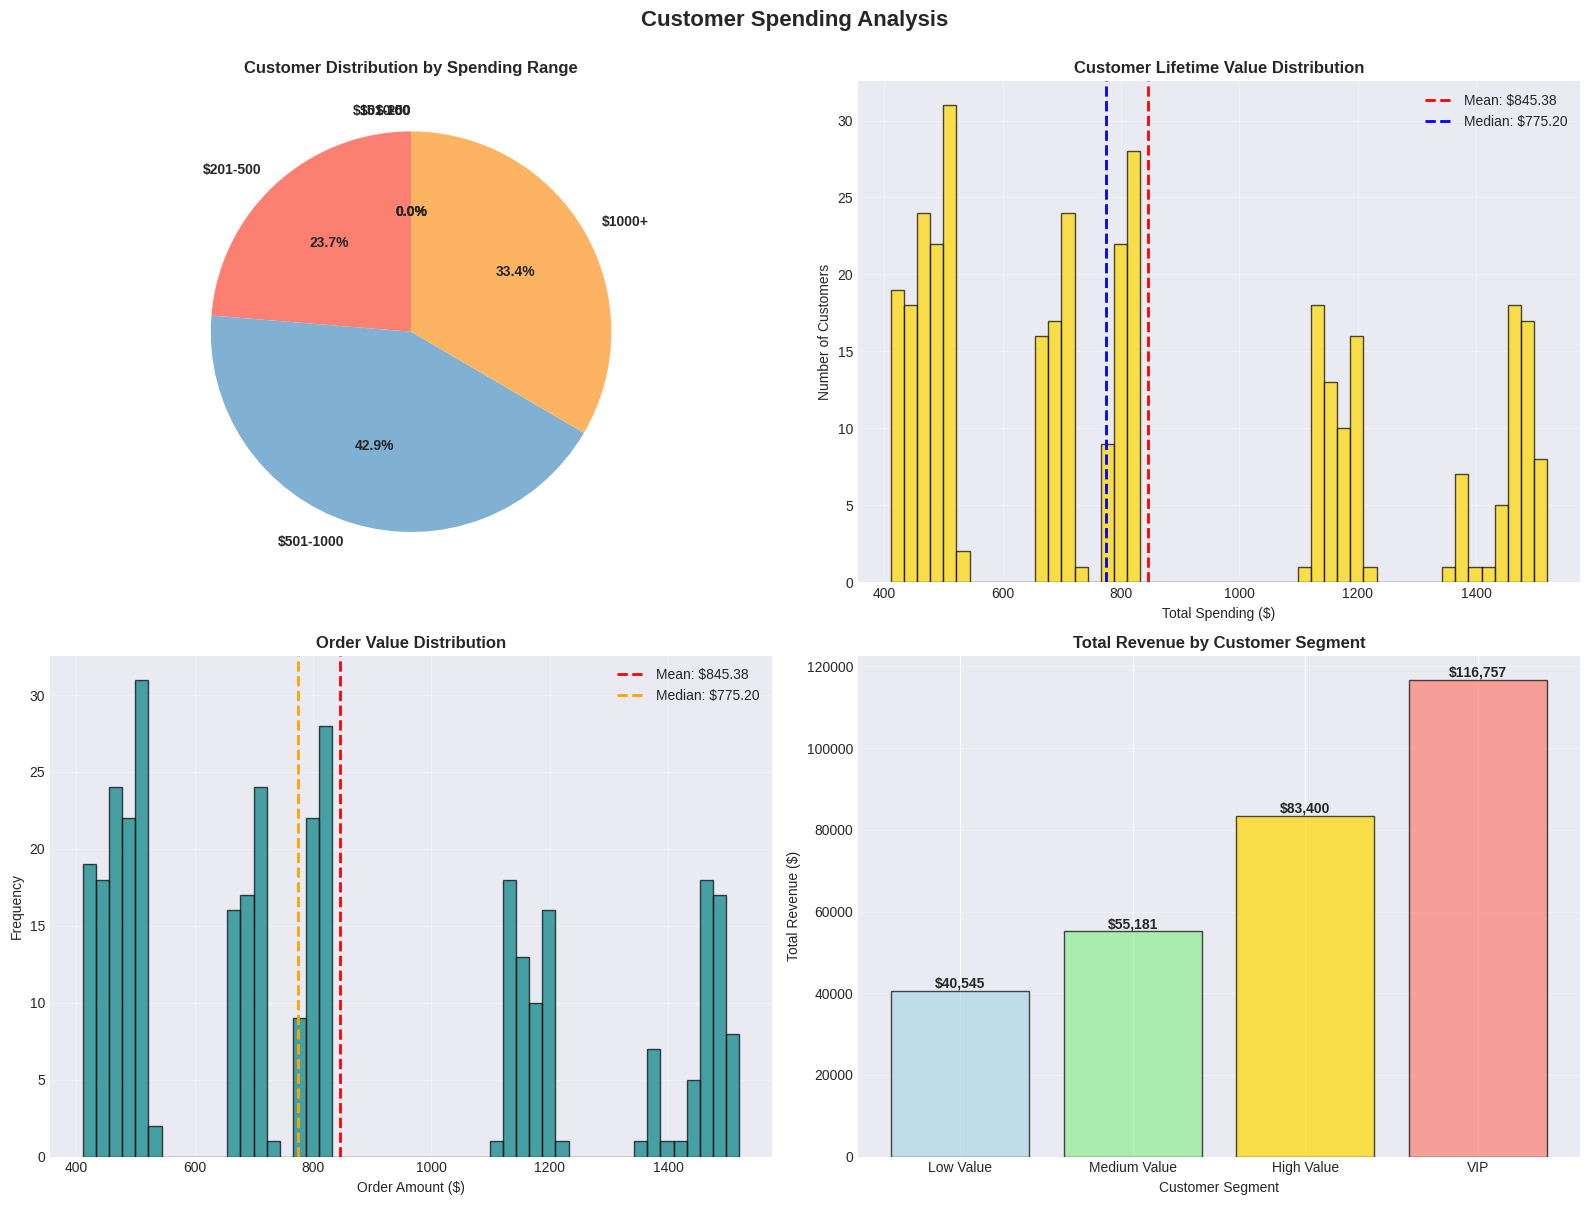

✓ Spending analysis visualizations created

                     VISUALIZATION: TOP CUSTOMERS                     


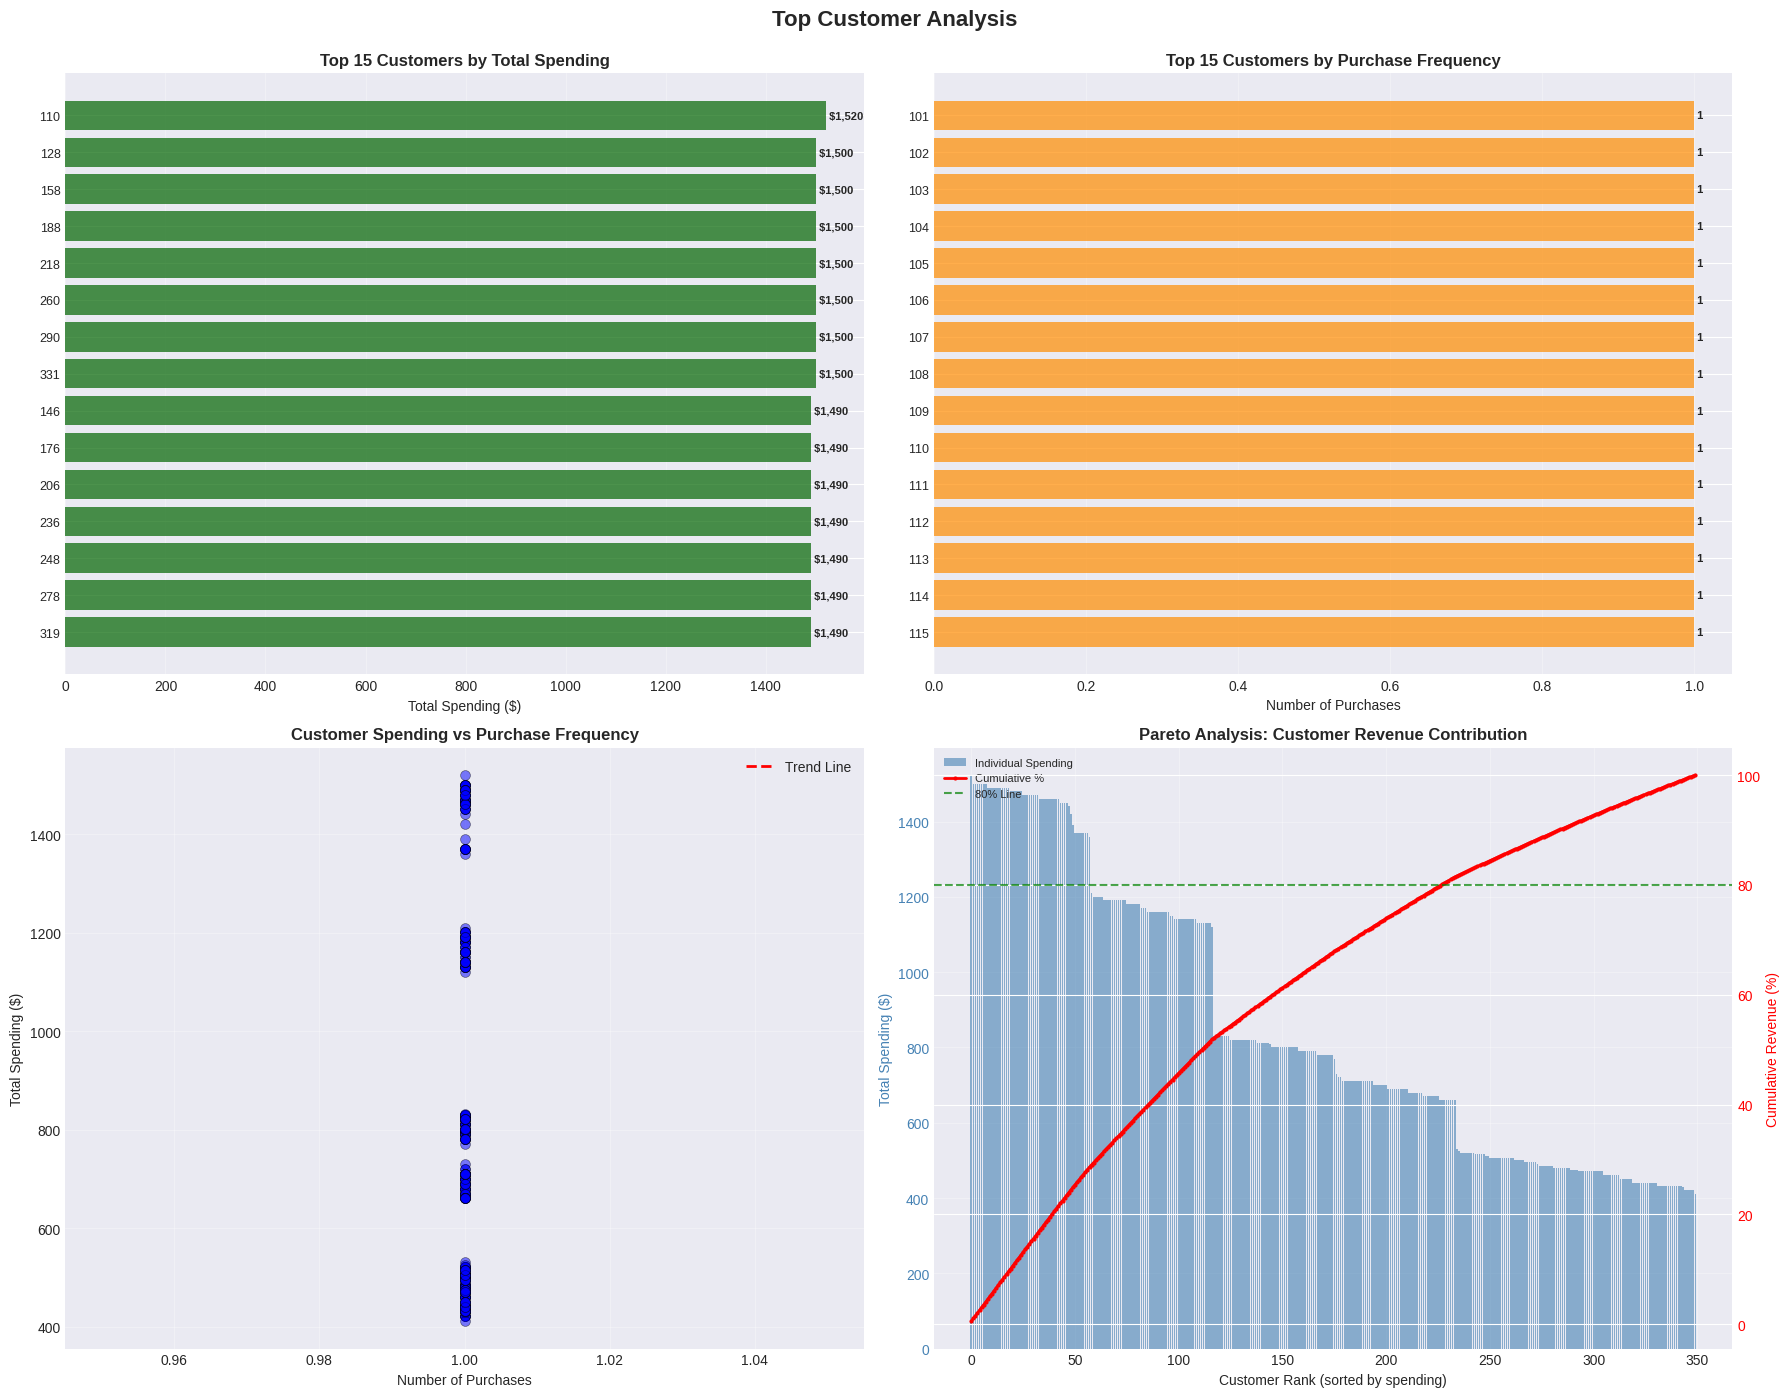

✓ Top customers visualizations created

                 VISUALIZATION: COMPARATIVE ANALYSIS                  


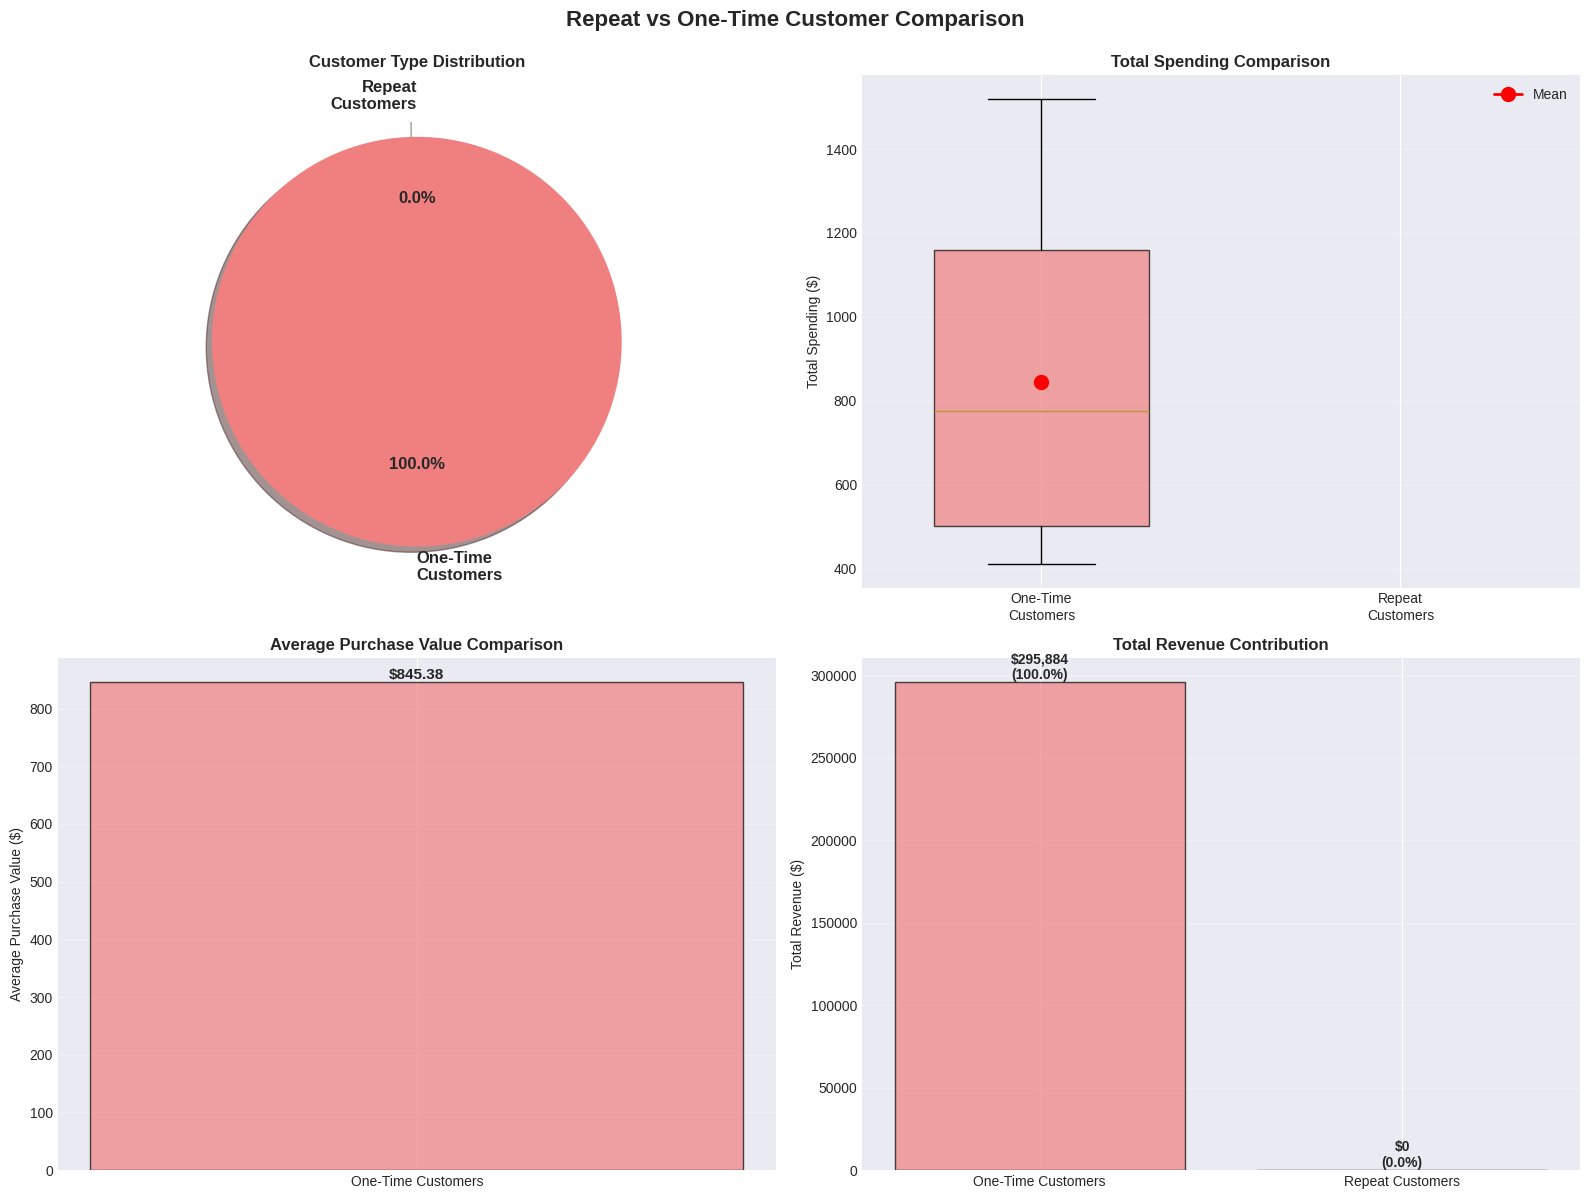

✓ Comparative analysis visualizations created

                 VISUALIZATION: CUSTOMER SEGMENTATION                 


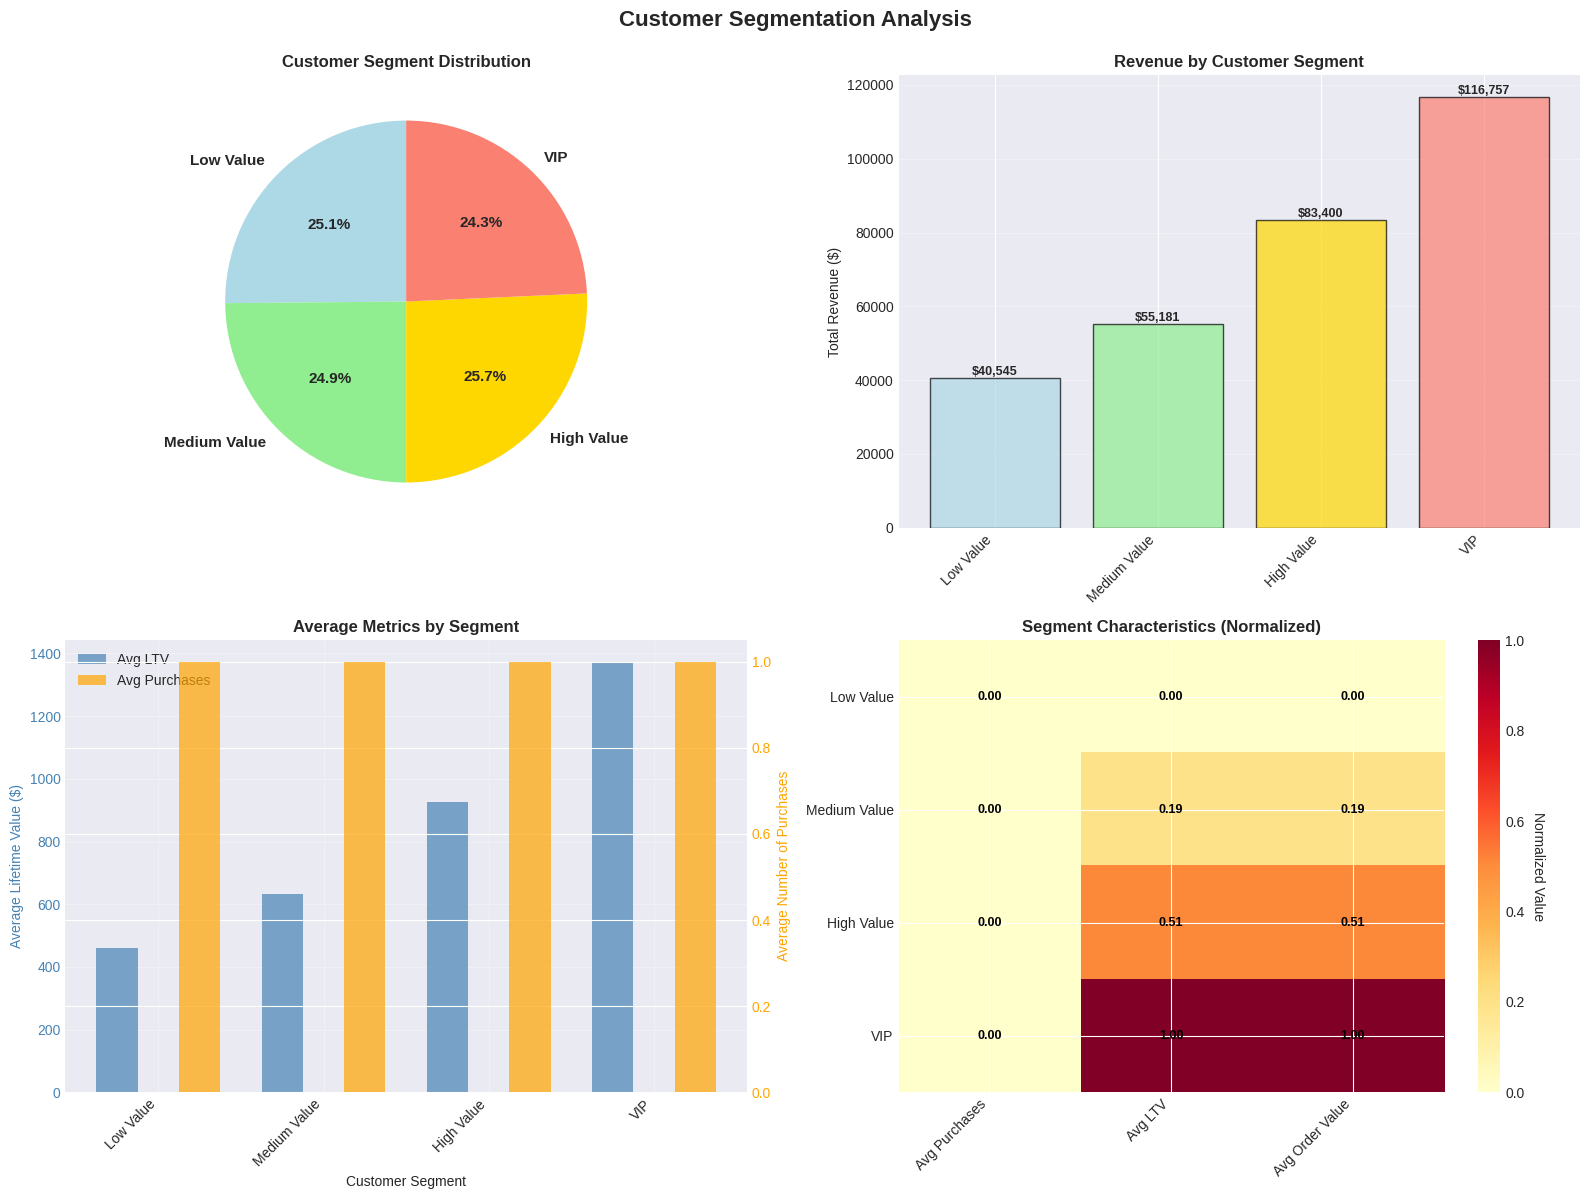

✓ Customer segmentation visualizations created

                      STATISTICAL SUMMARY TABLES                      

📊 OVERALL STATISTICS:
────────────────────────────────────────────────────────────────────────────────
                 Metric       Value
        Total Customers         350
           Total Orders         350
          Total Revenue $295,883.60
   Repeat Customer Rate       0.00%
Avg Orders per Customer        1.00
        Avg Order Value     $845.38
       Avg Customer LTV     $845.38


📈 SEGMENT-WISE STATISTICS:
────────────────────────────────────────────────────────────────────────────────────────────────────
                  Count  Avg_Purchases  Med_Purchases  Max_Purchases  Avg_LTV  \
Customer_Segment                                                                
Low Value            88            1.0            1.0              1   460.74   
Medium Value         87            1.0            1.0              1   634.26   
High Value           90            

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ All files downloaded successfully!

📊 ANALYSIS COMPLETE!

Generated Files:
  1. customer_analysis_complete.csv - Full customer data with metrics
  2. top_100_customers.csv - Top performing customers
  3. segment_analysis.csv - Segment-wise statistics
  4. analysis_summary.txt - Executive summary

Thank you for using the E-commerce Customer Behavior Analysis System!


In [3]:
print_section_header("ADVANCED ANALYTICS")

# RFM Analysis Proxy (Frequency and Monetary)
print("\n📊 Frequency-Monetary Analysis:")

# Dynamically handle cases where there are not enough unique values for qcut
num_unique_purchases = customer_agg['Purchase_Count'].nunique()
num_unique_spending = customer_agg['Total_Spending'].nunique()

# For Frequency Score
if num_unique_purchases <= 1:
    # If all purchase counts are the same (or only one customer), assign a single frequency score
    customer_agg['Frequency_Score'] = 1
else:
    # Otherwise, apply qcut, ensuring q is not greater than the number of unique values
    q_purchases = min(4, num_unique_purchases)
    customer_agg['Frequency_Score'] = pd.qcut(
        customer_agg['Purchase_Count'],
        q=q_purchases,
        labels=False, # Use labels=False to get integer indicators (0 to q-1)
        duplicates='drop'
    ).astype(int) + 1 # Add 1 to make scores from 1 to q

# For Monetary Score
if num_unique_spending <= 1:
    # If all spending amounts are the same (or only one customer), assign a single monetary score
    customer_agg['Monetary_Score'] = 1
else:
    # Otherwise, apply qcut, ensuring q is not greater than the number of unique values
    q_spending = min(4, num_unique_spending)
    customer_agg['Monetary_Score'] = pd.qcut(
        customer_agg['Total_Spending'],
        q=q_spending,
        labels=False, # Use labels=False to get integer indicators (0 to q-1)
        duplicates='drop'
    ).astype(int) + 1 # Add 1 to make scores from 1 to q

# Calculate FM_Score by summing Frequency and Monetary scores
customer_agg['FM_Score'] = customer_agg['Frequency_Score'] + customer_agg['Monetary_Score']

fm_distribution = customer_agg['FM_Score'].value_counts().sort_index()
print(f"   Score Distribution (Min={customer_agg['FM_Score'].min()}, Max={customer_agg['FM_Score'].max()}):")
for score, count in fm_distribution.items():
    print(f"      Score {score}: {count:,} customers")

# Customer Lifetime Value Distribution
print("\n💰 Customer Lifetime Value Distribution:")
ltv_stats = customer_agg['Total_Spending'].describe()
print(f"   • Min: {format_currency(ltv_stats['min'])}")
print(f"   • 25th Percentile: {format_currency(ltv_stats['25%'])}")
print(f"   • Median: {format_currency(ltv_stats['50%'])}")
print(f"   • 75th Percentile: {format_currency(ltv_stats['75%'])}")
print(f"   • Max: {format_currency(ltv_stats['max'])}")
print(f"   • Standard Deviation: {format_currency(ltv_stats['std'])}")

# Purchase Behavior Analysis
print("\n🛒 Purchase Behavior Patterns:")
freq_dist = customer_agg['Purchase_Frequency_Category'].value_counts()
for category in ['1 purchase', '2-3 purchases', '4-5 purchases', '6-10 purchases', '10+ purchases']:
    if category in freq_dist.index:
        count = freq_dist[category]
        pct = (count / total_customers) * 100
        print(f"   • {category}: {count:,} customers ({pct:.1f}%)")

# Spending Behavior Analysis
print("\n💳 Spending Behavior Patterns:")
spend_dist = customer_agg['Spending_Category'].value_counts()
spend_order = ['$0-50', '$51-100', '$101-200', '$201-500', '$501-1000', '$1000+']
for category in spend_order:
    if category in spend_dist.index:
        count = spend_dist[category]
        pct = (count / total_customers) * 100
        print(f"   • {category}: {count:,} customers ({pct:.1f}%)")

# Customer Concentration (Pareto Analysis)
customer_agg_sorted = customer_agg.sort_values('Total_Spending', ascending=False)
customer_agg_sorted['Cumulative_Revenue'] = customer_agg_sorted['Total_Spending'].cumsum()
customer_agg_sorted['Cumulative_Revenue_Pct'] = (customer_agg_sorted['Cumulative_Revenue'] / total_revenue) * 100

top_20_pct_count = int(total_customers * 0.2)
top_20_pct_revenue = customer_agg_sorted.iloc[:top_20_pct_count]['Total_Spending'].sum()
top_20_pct_revenue_pct = (top_20_pct_revenue / total_revenue) * 100

print("\n📈 Pareto Analysis (80/20 Rule):")
print(f"   • Top 20% of Customers ({top_20_pct_count:,} customers)")
print(f"   • Generate {format_currency(top_20_pct_revenue)} ({top_20_pct_revenue_pct:.1f}% of total revenue)")


# ==========================================
# SECTION 9: Top Customers Analysis
# ==========================================
print_section_header("TOP CUSTOMERS ANALYSIS")

# Top 20 customers by spending
top_20_spending = customer_agg.nlargest(20, 'Total_Spending')

print("\n🏆 TOP 20 CUSTOMERS BY TOTAL SPENDING:")
print("\n" + "─" * 100)
print(f"{'Rank':<6} {'Customer ID':<20} {'Total Spent':<15} {'Orders':<10} {'Avg Order':<15} {'Segment':<15}")
print("─" * 100)

for idx, row in enumerate(top_20_spending.iterrows(), 1):
    cust_id = str(row[1][customer_col])[:18]
    total = format_currency(row[1]['Total_Spending'])
    orders = int(row[1]['Purchase_Count'])
    avg = format_currency(row[1]['Avg_Purchase'])
    segment = row[1]['Customer_Segment']
    print(f"{idx:<6} {cust_id:<20} {total:<15} {orders:<10} {avg:<15} {segment:<15}")

# Top customers by frequency
top_20_frequency = customer_agg.nlargest(20, 'Purchase_Count')

print("\n\n🔄 TOP 20 CUSTOMERS BY PURCHASE FREQUENCY:")
print("\n" + "─" * 100)
print(f"{'Rank':<6} {'Customer ID':<20} {'Orders':<10} {'Total Spent':<15} {'Avg Order':<15} {'Segment':<15}")
print("─" * 100)

for idx, row in enumerate(top_20_frequency.iterrows(), 1):
    cust_id = str(row[1][customer_col])[:18]
    orders = int(row[1]['Purchase_Count'])
    total = format_currency(row[1]['Total_Spending'])
    avg = format_currency(row[1]['Avg_Purchase'])
    segment = row[1]['Customer_Segment']
    print(f"{idx:<6} {cust_id:<20} {orders:<10} {total:<15} {avg:<15} {segment:<15}")


# ==========================================
# SECTION 10: Visualization - Purchase Frequency
# ==========================================
print_section_header("VISUALIZATION: PURCHASE FREQUENCY")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Customer Purchase Frequency Analysis', fontsize=16, fontweight='bold', y=1.00)

# 1. Purchase Frequency Bar Chart
freq_data = customer_agg['Purchase_Frequency_Category'].value_counts()
freq_order = ['1 purchase', '2-3 purchases', '4-5 purchases', '6-10 purchases', '10+ purchases']
freq_data = freq_data.reindex(freq_order, fill_value=0)

axes[0, 0].bar(range(len(freq_data)), freq_data.values, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xticks(range(len(freq_data)))
axes[0, 0].set_xticklabels(freq_data.index, rotation=45, ha='right')
axes[0, 0].set_title('Purchase Frequency Distribution', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Frequency Category')
axes[0, 0].set_ylabel('Number of Customers')
axes[0, 0].grid(axis='y', alpha=0.3)

for i, v in enumerate(freq_data.values):
    axes[0, 0].text(i, v + max(freq_data.values)*0.02, f'{v:,}', ha='center', fontweight='bold')

# 2. Purchase Count Distribution
axes[0, 1].hist(customer_agg['Purchase_Count'], bins=30, color='green', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(avg_purchases_per_customer, color='red', linestyle='--', linewidth=2,
                   label=f'Mean: {avg_purchases_per_customer:.2f}')
axes[0, 1].axvline(median_purchases_per_customer, color='orange', linestyle='--', linewidth=2,
                   label=f'Median: {median_purchases_per_customer:.0f}')
axes[0, 1].set_title('Distribution of Purchases per Customer', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Number of Purchases')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Cumulative Distribution
sorted_purchases = np.sort(customer_agg['Purchase_Count'].values)
cumulative = np.arange(1, len(sorted_purchases) + 1) / len(sorted_purchases) * 100
axes[1, 0].plot(sorted_purchases, cumulative, linewidth=2, color='purple')
axes[1, 0].set_title('Cumulative Distribution of Purchase Frequency', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Number of Purchases')
axes[1, 0].set_ylabel('Cumulative Percentage (%)')
axes[1, 0].grid(alpha=0.3)
axes[1, 0].axhline(50, color='red', linestyle='--', alpha=0.5, label='50th Percentile')
axes[1, 0].legend()

# 4. Box Plot by Segment
segment_order = ['Low Value', 'Medium Value', 'High Value', 'VIP']
segment_data = [customer_agg[customer_agg['Customer_Segment'] == seg]['Purchase_Count'].values
                for seg in segment_order]
bp = axes[1, 1].boxplot(segment_data, labels=segment_order, patch_artist=True)
for patch, color in zip(bp['boxes'], ['lightblue', 'lightgreen', 'gold', 'salmon']):
    patch.set_facecolor(color)
axes[1, 1].set_title('Purchase Frequency by Customer Segment', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Customer Segment')
axes[1, 1].set_ylabel('Number of Purchases')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Purchase frequency visualizations created")


# ==========================================
# SECTION 11: Visualization - Spending Analysis
# ==========================================
print_section_header("VISUALIZATION: SPENDING ANALYSIS")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Customer Spending Analysis', fontsize=16, fontweight='bold', y=1.00)

# 1. Spending Category Pie Chart
spend_data = customer_agg['Spending_Category'].value_counts()
spend_order = ['$0-50', '$51-100', '$101-200', '$201-500', '$501-1000', '$1000+']
spend_data = spend_data.reindex(spend_order, fill_value=0)
colors = plt.cm.Set3(range(len(spend_data)))

axes[0, 0].pie(spend_data.values, labels=spend_data.index, autopct='%1.1f%%',
               startangle=90, colors=colors, textprops={'fontsize': 10, 'fontweight': 'bold'})
axes[0, 0].set_title('Customer Distribution by Spending Range', fontweight='bold', fontsize=12)

# 2. Customer LTV Distribution
axes[0, 1].hist(customer_agg['Total_Spending'], bins=50, color='gold', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(avg_customer_ltv, color='red', linestyle='--', linewidth=2,
                   label=f'Mean: {format_currency(avg_customer_ltv)}')
axes[0, 1].axvline(median_customer_ltv, color='blue', linestyle='--', linewidth=2,
                   label=f'Median: {format_currency(median_customer_ltv)}')
axes[0, 1].set_title('Customer Lifetime Value Distribution', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Total Spending ($)')
axes[0, 1].set_ylabel('Number of Customers')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Order Value Distribution
axes[1, 0].hist(df_clean[amount_col], bins=50, color='teal', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(avg_order_value, color='red', linestyle='--', linewidth=2,
                   label=f'Mean: {format_currency(avg_order_value)}')
axes[1, 0].axvline(median_order_value, color='orange', linestyle='--', linewidth=2,
                   label=f'Median: {format_currency(median_order_value)}')
axes[1, 0].set_title('Order Value Distribution', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Order Amount ($)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4. Spending by Customer Segment
segment_spending = customer_agg.groupby('Customer_Segment')['Total_Spending'].sum().reindex(segment_order)
colors_seg = ['lightblue', 'lightgreen', 'gold', 'salmon']
bars = axes[1, 1].bar(segment_order, segment_spending.values, color=colors_seg, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Total Revenue by Customer Segment', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Customer Segment')
axes[1, 1].set_ylabel('Total Revenue ($)')
axes[1, 1].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'${height:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Spending analysis visualizations created")


# ==========================================
# SECTION 12: Visualization - Top Customers
# ==========================================
print_section_header("VISUALIZATION: TOP CUSTOMERS")

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Top Customer Analysis', fontsize=16, fontweight='bold', y=0.995)

# 1. Top 15 by Spending
top_15_spend = customer_agg.nlargest(15, 'Total_Spending')
customer_labels = [str(cid)[:15] for cid in top_15_spend[customer_col]]
y_pos = np.arange(len(customer_labels))

axes[0, 0].barh(y_pos, top_15_spend['Total_Spending'], color='darkgreen', alpha=0.7)
axes[0, 0].set_yticks(y_pos)
axes[0, 0].set_yticklabels(customer_labels, fontsize=9)
axes[0, 0].invert_yaxis()
axes[0, 0].set_title('Top 15 Customers by Total Spending', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Total Spending ($)')
axes[0, 0].grid(axis='x', alpha=0.3)

for i, v in enumerate(top_15_spend['Total_Spending']):
    axes[0, 0].text(v, i, f' ${v:,.0f}', va='center', fontweight='bold', fontsize=8)

# 2. Top 15 by Purchase Frequency
top_15_freq = customer_agg.nlargest(15, 'Purchase_Count')
customer_labels_freq = [str(cid)[:15] for cid in top_15_freq[customer_col]]
y_pos_freq = np.arange(len(customer_labels_freq))

axes[0, 1].barh(y_pos_freq, top_15_freq['Purchase_Count'], color='darkorange', alpha=0.7)
axes[0, 1].set_yticks(y_pos_freq)
axes[0, 1].set_yticklabels(customer_labels_freq, fontsize=9)
axes[0, 1].invert_yaxis()
axes[0, 1].set_title('Top 15 Customers by Purchase Frequency', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Number of Purchases')
axes[0, 1].grid(axis='x', alpha=0.3)

for i, v in enumerate(top_15_freq['Purchase_Count']):
    axes[0, 1].text(v, i, f' {int(v)}', va='center', fontweight='bold', fontsize=8)

# 3. Scatter: Spending vs Frequency
axes[1, 0].scatter(customer_agg['Purchase_Count'], customer_agg['Total_Spending'],
                   alpha=0.5, s=50, c='blue', edgecolors='black', linewidth=0.5)
axes[1, 0].set_title('Customer Spending vs Purchase Frequency', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Number of Purchases')
axes[1, 0].set_ylabel('Total Spending ($)')
axes[1, 0].grid(alpha=0.3)

# Add trend line
z = np.polyfit(customer_agg['Purchase_Count'], customer_agg['Total_Spending'], 1)
p = np.poly1d(z)
axes[1, 0].plot(customer_agg['Purchase_Count'], p(customer_agg['Purchase_Count']),
                "r--", linewidth=2, label='Trend Line')
axes[1, 0].legend()

# 4. Pareto Chart
customer_sorted = customer_agg.sort_values('Total_Spending', ascending=False).reset_index(drop=True)
customer_sorted['Cumulative_Pct'] = (customer_sorted['Total_Spending'].cumsum() / total_revenue) * 100

ax1 = axes[1, 1]
ax2 = ax1.twinx()

x_data = np.arange(len(customer_sorted))
ax1.bar(x_data, customer_sorted['Total_Spending'], color='steelblue', alpha=0.6, label='Individual Spending')
ax2.plot(x_data, customer_sorted['Cumulative_Pct'], color='red', linewidth=2, marker='o',
         markersize=2, label='Cumulative %')
ax2.axhline(80, color='green', linestyle='--', alpha=0.7, label='80% Line')

ax1.set_xlabel('Customer Rank (sorted by spending)')
ax1.set_ylabel('Total Spending ($)', color='steelblue')
ax2.set_ylabel('Cumulative Revenue (%)', color='red')
ax1.set_title('Pareto Analysis: Customer Revenue Contribution', fontweight='bold', fontsize=12)
ax1.tick_params(axis='y', labelcolor='steelblue')
ax2.tick_params(axis='y', labelcolor='red')
ax1.grid(alpha=0.3)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

print("✓ Top customers visualizations created")


# ==========================================
# SECTION 13: Visualization - Comparative Analysis
# ==========================================
print_section_header("VISUALIZATION: COMPARATIVE ANALYSIS")

# Separate data for repeat vs one-time customers
repeat_data = customer_agg[customer_agg['Purchase_Count'] > 1]
onetime_data = customer_agg[customer_agg['Purchase_Count'] == 1]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Repeat vs One-Time Customer Comparison', fontsize=16, fontweight='bold', y=0.995)

# 1. Count Comparison
labels = ['One-Time\nCustomers', 'Repeat\nCustomers']
sizes = [len(onetime_data), len(repeat_data)]
colors_pie = ['lightcoral', 'lightgreen']
explode = (0.05, 0.05)

axes[0, 0].pie(sizes, explode=explode, labels=labels, colors=colors_pie, autopct='%1.1f%%',
               shadow=True, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[0, 0].set_title('Customer Type Distribution', fontweight='bold', fontsize=12)

# 2. Spending Comparison Box Plot
data_to_plot = [onetime_data['Total_Spending'], repeat_data['Total_Spending']]
bp = axes[0, 1].boxplot(data_to_plot, labels=labels, patch_artist=True, widths=0.6)
for patch, color in zip(bp['boxes'], colors_pie):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[0, 1].set_title('Total Spending Comparison', fontweight='bold', fontsize=12)
axes[0, 1].set_ylabel('Total Spending ($)')
axes[0, 1].grid(axis='y', alpha=0.3)

# Add mean markers
means = [onetime_data['Total_Spending'].mean(), repeat_data['Total_Spending'].mean()]
axes[0, 1].plot([1, 2], means, 'ro-', linewidth=2, markersize=10, label='Mean')
axes[0, 1].legend()

# 3. Average Purchase Value Comparison
avg_onetime = onetime_data['Avg_Purchase'].mean()
avg_repeat = repeat_data['Avg_Purchase'].mean()

bars = axes[1, 0].bar(['One-Time Customers', 'Repeat Customers'],
                      [avg_onetime, avg_repeat],
                      color=colors_pie, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Average Purchase Value Comparison', fontweight='bold', fontsize=12)
axes[1, 0].set_ylabel('Average Purchase Value ($)')
axes[1, 0].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                    f'${height:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# 4. Revenue Contribution
revenue_onetime = onetime_data['Total_Spending'].sum()
revenue_repeat = repeat_data['Total_Spending'].sum()

bars = axes[1, 1].bar(['One-Time Customers', 'Repeat Customers'],
                      [revenue_onetime, revenue_repeat],
                      color=colors_pie, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Total Revenue Contribution', fontweight='bold', fontsize=12)
axes[1, 1].set_ylabel('Total Revenue ($)')
axes[1, 1].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    pct = (height / total_revenue) * 100
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'${height:,.0f}\n({pct:.1f}%)', ha='center', va='bottom',
                    fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

print("✓ Comparative analysis visualizations created")


# ==========================================
# SECTION 14: Customer Segmentation Visualization
# ==========================================
print_section_header("VISUALIZATION: CUSTOMER SEGMENTATION")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Customer Segmentation Analysis', fontsize=16, fontweight='bold', y=0.995)

# 1. Segment Distribution
segment_counts = customer_agg['Customer_Segment'].value_counts().reindex(segment_order)
colors_seg = ['lightblue', 'lightgreen', 'gold', 'salmon']

axes[0, 0].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%',
               startangle=90, colors=colors_seg, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[0, 0].set_title('Customer Segment Distribution', fontweight='bold', fontsize=12)

# 2. Revenue by Segment
segment_revenue = customer_agg.groupby('Customer_Segment')['Total_Spending'].sum().reindex(segment_order)
bars = axes[0, 1].bar(segment_order, segment_revenue.values, color=colors_seg,
                      edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Revenue by Customer Segment', fontweight='bold', fontsize=12)
axes[0, 1].set_ylabel('Total Revenue ($)')
axes[0, 1].set_xticklabels(segment_order, rotation=45, ha='right')
axes[0, 1].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'${height:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 3. Average Metrics by Segment
segment_metrics = customer_agg.groupby('Customer_Segment').agg({
    'Total_Spending': 'mean',
    'Purchase_Count': 'mean',
    'Avg_Purchase': 'mean'
}).reindex(segment_order)

x = np.arange(len(segment_order))
width = 0.25

bars1 = axes[1, 0].bar(x - width, segment_metrics['Total_Spending'], width,
                       label='Avg LTV', color='steelblue', alpha=0.7)
axes[1, 0].set_xlabel('Customer Segment')
axes[1, 0].set_ylabel('Average Lifetime Value ($)', color='steelblue')
axes[1, 0].set_title('Average Metrics by Segment', fontweight='bold', fontsize=12)
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(segment_order, rotation=45, ha='right')
axes[1, 0].tick_params(axis='y', labelcolor='steelblue')
axes[1, 0].grid(alpha=0.3)

ax_twin = axes[1, 0].twinx()
bars2 = ax_twin.bar(x + width, segment_metrics['Purchase_Count'], width,
                    label='Avg Purchases', color='orange', alpha=0.7)
ax_twin.set_ylabel('Average Number of Purchases', color='orange')
ax_twin.tick_params(axis='y', labelcolor='orange')

# Add legend
lines1, labels1 = axes[1, 0].get_legend_handles_labels()
lines2, labels2 = ax_twin.get_legend_handles_labels()
axes[1, 0].legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# 4. Segment Characteristics Heatmap
segment_char = customer_agg.groupby('Customer_Segment').agg({
    'Purchase_Count': 'mean',
    'Total_Spending': 'mean',
    'Avg_Purchase': 'mean'
}).reindex(segment_order)

# Normalize for heatmap
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
segment_char_norm = pd.DataFrame(
    scaler.fit_transform(segment_char),
    columns=segment_char.columns,
    index=segment_char.index
)

im = axes[1, 1].imshow(segment_char_norm.values, cmap='YlOrRd', aspect='auto')
axes[1, 1].set_xticks(np.arange(len(segment_char_norm.columns)))
axes[1, 1].set_yticks(np.arange(len(segment_char_norm.index)))
axes[1, 1].set_xticklabels(['Avg Purchases', 'Avg LTV', 'Avg Order Value'], rotation=45, ha='right')
axes[1, 1].set_yticklabels(segment_char_norm.index)
axes[1, 1].set_title('Segment Characteristics (Normalized)', fontweight='bold', fontsize=12)

# Add colorbar
cbar = plt.colorbar(im, ax=axes[1, 1])
cbar.set_label('Normalized Value', rotation=270, labelpad=15)

# Add text annotations
for i in range(len(segment_char_norm.index)):
    for j in range(len(segment_char_norm.columns)):
        text = axes[1, 1].text(j, i, f'{segment_char_norm.iloc[i, j]:.2f}',
                              ha="center", va="center", color="black", fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print("✓ Customer segmentation visualizations created")


# ==========================================
# SECTION 15: Statistical Summary Tables
# ==========================================
print_section_header("STATISTICAL SUMMARY TABLES")

print("\n📊 OVERALL STATISTICS:")
print("─" * 80)
overall_stats = pd.DataFrame({
    'Metric': [
        'Total Customers',
        'Total Orders',
        'Total Revenue',
        'Repeat Customer Rate',
        'Avg Orders per Customer',
        'Avg Order Value',
        'Avg Customer LTV'
    ],
    'Value': [
        f'{total_customers:,}',
        f'{total_orders:,}',
        format_currency(total_revenue),
        format_percentage(repeat_rate),
        f'{avg_orders_per_customer:.2f}',
        format_currency(avg_order_value),
        format_currency(avg_customer_ltv)
    ]
})
print(overall_stats.to_string(index=False))

print("\n\n📈 SEGMENT-WISE STATISTICS:")
print("─" * 100)
segment_stats = customer_agg.groupby('Customer_Segment').agg({
    customer_col: 'count',
    'Purchase_Count': ['mean', 'median', 'max'],
    'Total_Spending': ['mean', 'median', 'max', 'sum']
}).round(2)

segment_stats.columns = ['Count', 'Avg_Purchases', 'Med_Purchases', 'Max_Purchases',
                         'Avg_LTV', 'Med_LTV', 'Max_LTV', 'Total_Revenue']
segment_stats = segment_stats.reindex(segment_order)
print(segment_stats)

print("\n\n💰 REVENUE DISTRIBUTION:")
print("─" * 80)
revenue_dist = pd.DataFrame({
    'Segment': segment_order,
    'Customers': segment_counts.values,
    'Customer_Pct': [(c/total_customers)*100 for c in segment_counts.values],
    'Revenue': segment_revenue.values,
    'Revenue_Pct': [(r/total_revenue)*100 for r in segment_revenue.values],
    'Avg_LTV': [segment_revenue[seg]/segment_counts[seg] for seg in segment_order]
})
print(revenue_dist.to_string(index=False))


# ==========================================
# SECTION 16: Business Insights & Recommendations
# ==========================================
print_section_header("BUSINESS INSIGHTS & RECOMMENDATIONS")

print("\n🎯 KEY INSIGHTS:\n")

# Insight 1: Repeat Customer Performance
print(f"1. CUSTOMER RETENTION:")
print(f"   • {format_percentage(repeat_rate)} of customers make repeat purchases")
if repeat_rate < 20:
    print(f"   ⚠ LOW: Focus on retention strategies and customer loyalty programs")
elif repeat_rate < 40:
    print(f"   ✓ MODERATE: Good foundation, but room for improvement")
else:
    print(f"   ✓ EXCELLENT: Strong customer retention")
print(f"   • Repeat customers generate {format_currency(repeat_data['Total_Spending'].sum())} ")
print(f"     ({(repeat_data['Total_Spending'].sum()/total_revenue)*100:.1f}% of total revenue)")

# Insight 2: Customer Value Distribution
print(f"\n2. CUSTOMER VALUE CONCENTRATION:")
print(f"   • Top 20% of customers generate {format_percentage(top_20_pct_revenue_pct)} of revenue")
if top_20_pct_revenue_pct > 70:
    print(f"   ⚠ HIGH CONCENTRATION: Diversify customer base to reduce risk")
else:
    print(f"   ✓ Healthy distribution across customer segments")

# Insight 3: Average Order Value
print(f"\n3. ORDER VALUE ANALYSIS:")
print(f"   • Average Order Value: {format_currency(avg_order_value)}")
print(f"   • Median Order Value: {format_currency(median_order_value)}")
if avg_order_value > median_order_value * 1.5:
    print(f"   📊 Right-skewed: Few high-value orders pulling up the average")
    print(f"   💡 Opportunity: Upsell/cross-sell to increase median order value")

# Insight 4: Customer Segments
print(f"\n4. CUSTOMER SEGMENT OPPORTUNITIES:")
vip_count = segment_counts.get('VIP', 0)
low_count = segment_counts.get('Low Value', 0)
print(f"   • VIP Customers: {vip_count} ({(vip_count/total_customers)*100:.1f}%)")
print(f"   • Low Value Customers: {low_count} ({(low_count/total_customers)*100:.1f}%)")
print(f"   💡 Focus on converting Low/Medium value customers to High value")

print(f"\n\n🎯 ACTIONABLE RECOMMENDATIONS:\n")

recommendations = [
    ("Retention Strategy",
     f"With {format_percentage(100-repeat_rate)} one-time customers, implement email campaigns, "
     "loyalty programs, and personalized offers to encourage repeat purchases"),

    ("VIP Customer Program",
     f"Create exclusive benefits for your {vip_count} VIP customers who generate significant revenue"),

    ("Win-back Campaign",
     "Target one-time customers with special offers to convert them into repeat buyers"),

    ("Upselling Opportunity",
     f"Average order value is {format_currency(avg_order_value)}. Create bundled offers to increase cart size"),

    ("Customer Segmentation",
     "Use the segment data to personalize marketing messages and product recommendations"),

    ("Low-Value Activation",
     f"{low_count} low-value customers represent untapped potential for revenue growth")
]

for idx, (title, desc) in enumerate(recommendations, 1):
    print(f"{idx}. {title.upper()}")
    print(f"   {desc}\n")


# ==========================================
# SECTION 17: Export Analysis Results
# ==========================================
print_section_header("EXPORT ANALYSIS RESULTS")

print("📁 Preparing export files...\n")

# Export 1: Complete Customer Analysis
export_customer = customer_agg.copy()
export_customer.to_csv('customer_analysis_complete.csv', index=False)
print("✓ customer_analysis_complete.csv")
print(f"  Contains: {len(export_customer)} customers with all metrics")

# Export 2: Top Customers
export_top = customer_agg.nlargest(100, 'Total_Spending')
export_top.to_csv('top_100_customers.csv', index=False)
print("\n✓ top_100_customers.csv")
print(f"  Contains: Top 100 customers by spending")

# Export 3: Customer Segments
export_segments = customer_agg.groupby('Customer_Segment').agg({
    customer_col: 'count',
    'Purchase_Count': ['mean', 'sum'],
    'Total_Spending': ['mean', 'sum'],
    'Avg_Purchase': 'mean'
}).round(2)
export_segments.to_csv('segment_analysis.csv')
print("\n✓ segment_analysis.csv")
print(f"  Contains: Aggregated statistics by customer segment")

# Export 4: Summary Report
with open('analysis_summary.txt', 'w') as f:
    f.write("="*80 + "\n")
    f.write("E-COMMERCE CUSTOMER BEHAVIOR ANALYSIS - SUMMARY REPORT\n")
    f.write("="*80 + "\n\n")
    f.write(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"Dataset: {filename}\n\n")
    f.write(f"OVERVIEW:\n")
    f.write(f"  Total Customers: {total_customers:,}\n")
    f.write(f"  Total Orders: {total_orders:,}\n")
    f.write(f"  Total Revenue: {format_currency(total_revenue)}\n")
    f.write(f"  Repeat Rate: {format_percentage(repeat_rate)}\n\n")
    f.write(f"KEY METRICS:\n")
    f.write(f"  Avg Order Value: {format_currency(avg_order_value)}\n")
    f.write(f"  Avg Customer LTV: {format_currency(avg_customer_ltv)}\n")
    f.write(f"  Avg Orders/Customer: {avg_orders_per_customer:.2f}\n\n")
    f.write(f"TOP INSIGHTS:\n")
    f.write(f"  - {repeat_customers:,} customers ({format_percentage(repeat_rate)}) made repeat purchases\n")
    f.write(f"  - Top 20% customers generate {format_percentage(top_20_pct_revenue_pct)} of revenue\n")
    f.write(f"  - {vip_count} VIP customers identified\n")

print("\n✓ analysis_summary.txt")
print(f"  Contains: Text summary of key findings")

# Download files (only in Colab)
if COLAB_ENV:
    print("\n📥 Downloading files...")
    files.download('customer_analysis_complete.csv')
    files.download('top_100_customers.csv')
    files.download('segment_analysis.csv')
    files.download('analysis_summary.txt')
    print("✓ All files downloaded successfully!")
else:
    print("\n✓ Files saved to current directory")

print("\n" + "="*70)
print("📊 ANALYSIS COMPLETE!")
print("="*70)
print("\nGenerated Files:")
print("  1. customer_analysis_complete.csv - Full customer data with metrics")
print("  2. top_100_customers.csv - Top performing customers")
print("  3. segment_analysis.csv - Segment-wise statistics")
print("  4. analysis_summary.txt - Executive summary")
print("\nThank you for using the E-commerce Customer Behavior Analysis System!")
print("="*70)
